# Stellar Classification Dataset - SDSS17

## Discentes

- David Alves (511125)
- Francisco Breno (511429)

## Qual o problema a ser resolvido?
Na astronomia, o esquema de classificação de galáxias, quasares e estrelas
é um dos mais fundamentais. O dataset Stellar Classification Dataset - SDSS17
contém dados espectrais de diferentes corpos estelares visando classificar estrelas,
galáxias e quasares com base nessas características.

### Descrição do dataset
Esse dataset consiste em 100.000 observações (linhas) do espaço feitas pelo
SDSS (Sloan Digital Sky Survey), onde cada observação é descrita por 17 colunas
(colunas) de recursos e 1 coluna (label) de classe que a identifica as observações
como uma estrela, galáxia ou quasar.

O resultado que desejamos alcançar é a classificação em uma das três
categorias (estrela, galáxia e quasar) com base nos dados analisados.

### Tipo do problema
O tipo do nosso problema envolve aprendizagem supervisionada, mais
especificamente, um problema de classificação.

## Análise exploratória dos dados

### Importações

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

### Carregando os dados

In [3]:
dados = pd.read_csv('./data/star_classification.csv')
dados.shape

(100000, 18)

### Análise dos tipos de dados

In [105]:
dados.dtypes

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

### Análise de valores faltantes

In [106]:
dados.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

### Descrição dos dados

In [107]:
dados.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [108]:
dados.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


### Descrição da coluna 'class'

In [109]:
dados['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [4]:
labelEncoder = LabelEncoder()
dados['class'] = labelEncoder.fit_transform(dados['class'])
dados['class'].value_counts()

class
0    59445
2    21594
1    18961
Name: count, dtype: int64

#### Dados drop

In [5]:
print(dados['rerun_ID'].value_counts())
dados.drop(columns=['rerun_ID', 'z'], inplace=True)

rerun_ID
301    100000
Name: count, dtype: int64


#### Dividindo os dados

In [7]:
X = dados.drop(columns=['class'])
y = dados['class']

#### Histogramas

15


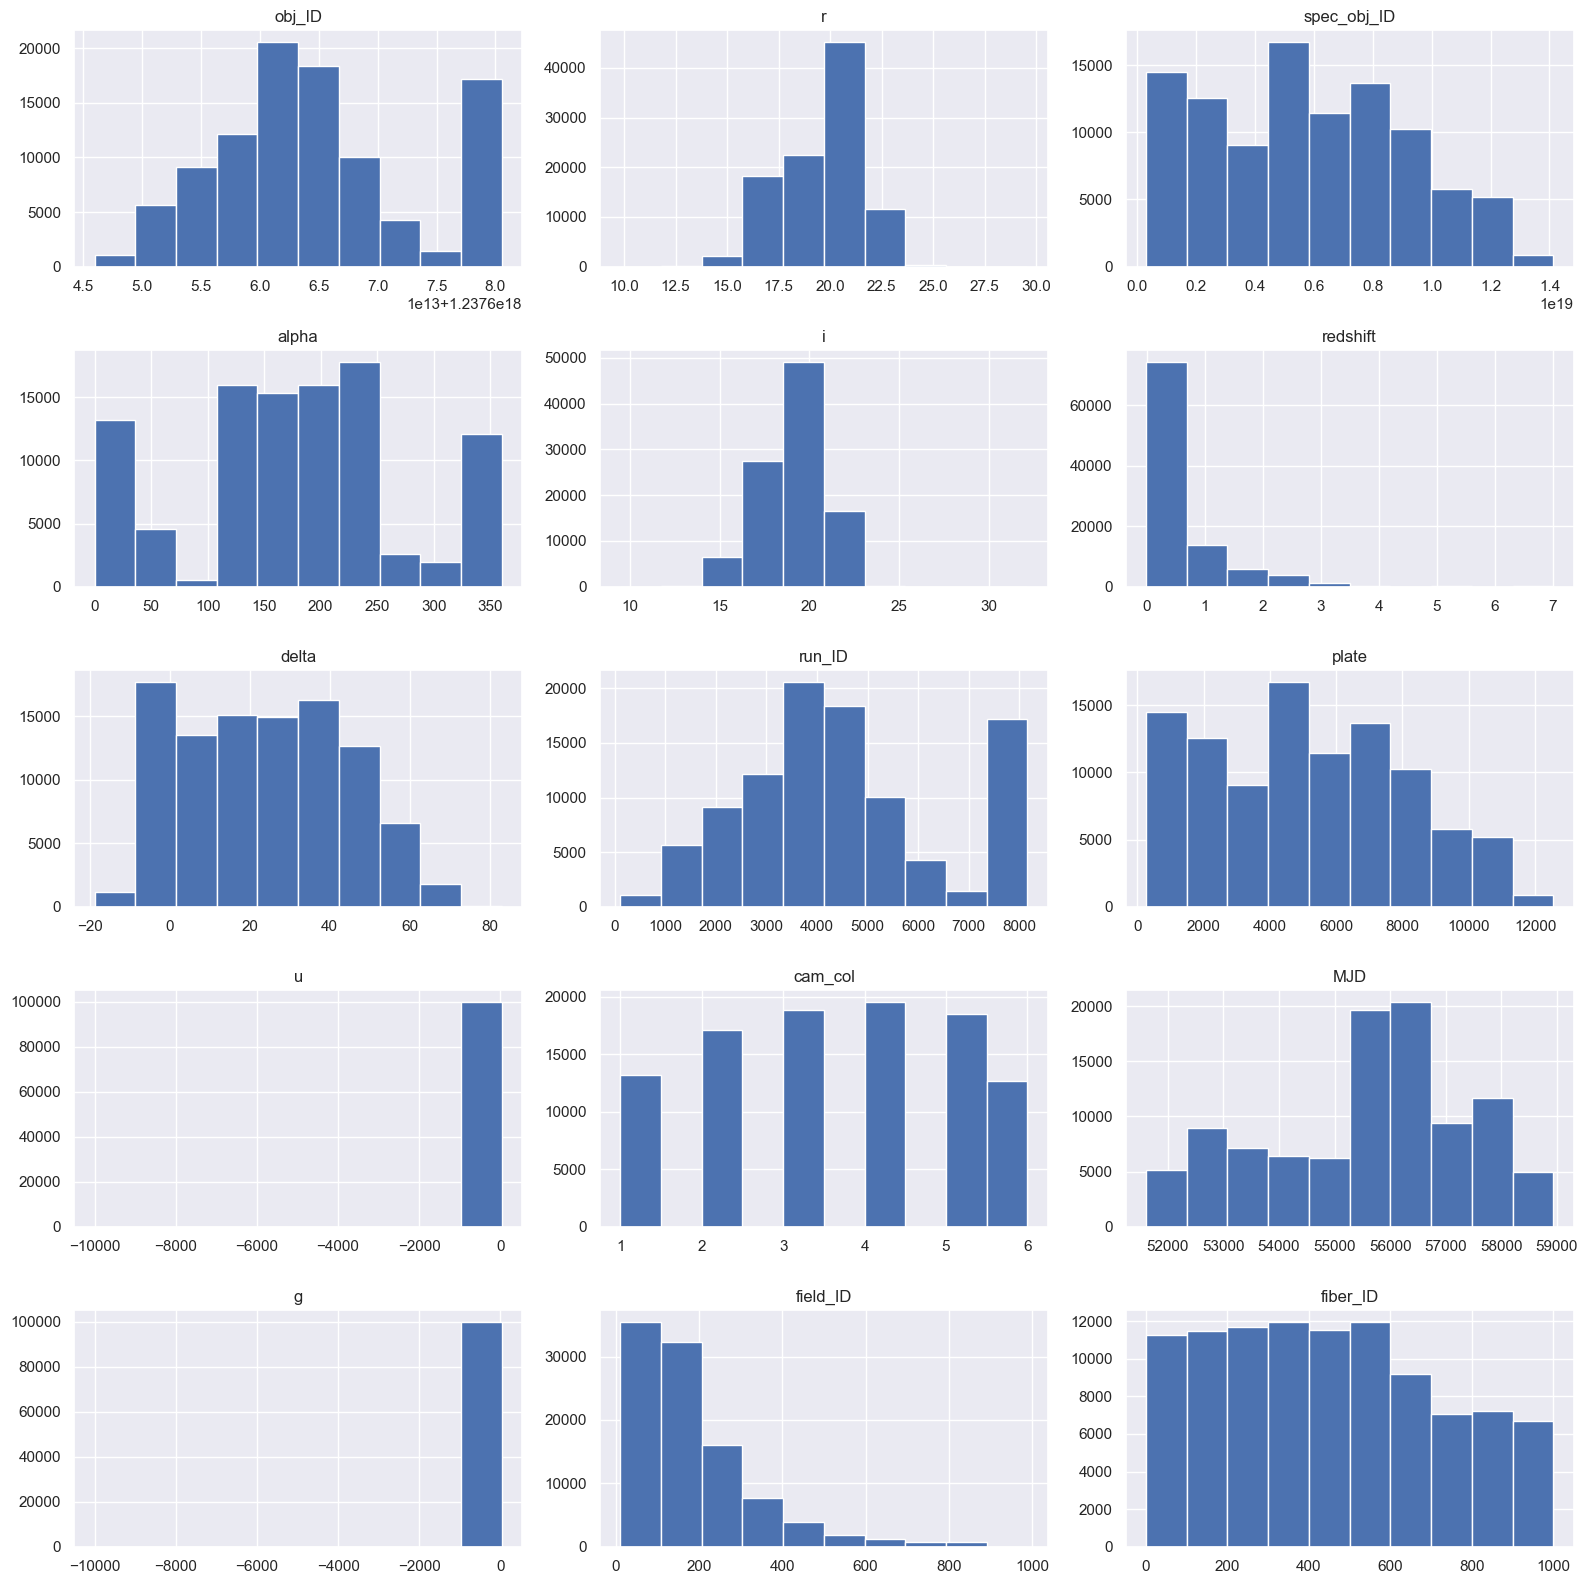

In [149]:
import math
fig, axs = plt.subplots(5, 3, figsize=(16, 16))

columns = list(X.columns)
print(len(columns))

for ind, col in enumerate(columns):
    axs[ind%5][math.floor(ind/5)].hist(X[col])
    axs[ind%5][math.floor(ind/5)].set_title(col)

plt.tight_layout()
plt.show()

### Técnicas de machine learning 

#### Divisão em treino, teste e normalização dos dados

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

normalizacao = StandardScaler()
normalizacao.fit(X_train)

X_train_std = normalizacao.transform(X_train)
X_test_std = normalizacao.transform(X_test)

#### Cálculo das métricas

In [9]:
from sklearn.metrics import confusion_matrix

targetNames = ['galaxy', 'star', 'quasar']
mediaMetricas = {}

In [64]:
def metricasMatrizConfusao(y_test, y_pred, targetNames):
  result = []
  for ind, _ in enumerate(targetNames):
    tp = 0    # Verdadeiro positivo
    fp = 0    # Falso positivo
    tn = 0    # Verdadeiro negativo
    fn = 0    # Falso negativo

    for real, prev in zip(y_test, y_pred):
      if real == ind and prev == ind:
        tp += 1
      elif real != ind and prev == ind:
        fp += 1
      elif real != ind and prev != ind:
        tn += 1
      elif real == ind and prev != ind:
        fn += 1
    result.append([ind, {'TP': tp, 'FP': fp, 'TN': tn, 'FN': fn}])

  return result

def mediaDasMetricas(metricas, count):
  result = 0
  for elem in metricas:
    result += elem[1]
  result /= count
  return result

def calcularMetricas(y_test, y_pred, targetNames):
  metricas = metricasMatrizConfusao(y_test, y_pred, targetNames)
  acc = []
  prec = []
  rec = []
  f1m = []
  for elem in metricas:
    acc.append([elem[0], (elem[1]['TP'] + elem[1]['TN']) / (elem[1]['TP'] + elem[1]['FP'] + elem[1]['TN'] + elem[1]['FN'])])
    prec.append([elem[0], elem[1]['TP'] / (elem[1]['TP'] + elem[1]['FP'])])
    rec.append([elem[0], elem[1]['TP'] / (elem[1]['TP'] + elem[1]['FN'])])
    f1m.append([prec[-1][0], 2 * (prec[-1][1] * rec[-1][1]) / (prec[-1][1] + rec[-1][1])])

  result = {
    'recall': mediaDasMetricas(rec, len(rec)),
    'accuracy': mediaDasMetricas(acc, len(acc)),
    'precision': mediaDasMetricas(prec, len(prec)),
    'f1_measure': mediaDasMetricas(f1m, len(f1m))
  }

  for key, value in zip(result.keys(), result.values()):
    print(f'{key}: {round(value * 100, 2)}%')

  return result

#### KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
param_grid = {'n_neighbors': np.arange(1, 20, 2), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'chebyshev', 'manhattan']}

knn = KNeighborsClassifier() 
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train_std, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'chebyshev', 'manhattan'],
                         'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'weights': ['uniform', 'distance']})

In [13]:
print(f'Best Params: {knn_cv.best_params_}')
print(f'Best Score:  {round(knn_cv.best_score_ * 100, 2)}%')

Best Params: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best Score:  90.65%


In [14]:
y_pred = knn_cv.predict(X_test_std)

In [15]:
print(f'Accuracy Score: {round(accuracy_score(y_test, y_pred) * 100, 2)}%')

Accuracy Score: 91.16%


#### Matriz de confusão

In [16]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11485   117   287]
 [  585  3144    63]
 [  702    15  3602]]


In [17]:
mediaMetricas['KNN'] = calcularMetricas(y_test, y_pred, targetNames)

recall: 87.64%
accuracy: 94.1%
precision: 92.35%
f1_measure: 89.74%


### Árvore de decisão

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
# Utilizando GridSearchCV para automatizar o teste do modelo com vários parâmetros

classifier = DecisionTreeClassifier()

param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10]
}

# Cria a grid utilizando o classificador, os parâmetros selecionados, e cross-validation com 5 folds
grid_search = GridSearchCV(classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Melhores parâmetros encontrados
print("Melhores parâmetros: ", grid_search.best_params_)
print("Melhor Score: ", grid_search.best_score_)

Melhores parâmetros:  {'criterion': 'log_loss', 'max_depth': 10, 'min_samples_split': 10}
Melhor Score:  0.9738125


In [20]:
best_params = grid_search.best_params_  
classifier = DecisionTreeClassifier(**best_params)  
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=10, min_samples_split=10)

In [21]:
y_pred = classifier.predict(X_test)

print(f'Accuracy Score: {round(accuracy_score(y_test, y_pred) * 100, 2)}%')

Accuracy Score: 97.67%


#### Matriz de confusão

In [22]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11699   174    16]
 [  266  3526     0]
 [   10     0  4309]]


In [23]:
mediaMetricas['DT'] = calcularMetricas(y_test, y_pred, targetNames)

recall: 97.05%
accuracy: 98.45%
precision: 97.54%
f1_measure: 97.29%


### MLP

In [24]:
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping

In [ ]:
callback = EarlyStopping(monitor="val_accuracy", patience=10)

maxAcc = float("-inf")
numLayers = np.arange(1, 6)
numNeurons = np.arange(5, 14, 2)
optimizers = ['rmsprop']

bestNumLayers = numLayers[0]
bestNumNeuron = numNeurons[0]
bestOptimizer = optimizers[0]


for nLayer in numLayers:
    for nNeuron in numNeurons:
        for optimizer in optimizers:
            sqLayers = [Dense(nNeuron, activation="relu")] * (nLayer - 1) + [
                Dense(nNeuron, activation="softmax")
            ]
            model = Sequential(sqLayers)
            model.compile(
                optimizer=optimizer,
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy", "top_k_categorical_accuracy"],
            )
            history = model.fit(
                x=X_train_std,
                y=y_train,
                epochs=25,
                callbacks=[callback],
                validation_split=0.1,
                verbose=1,
            )

            if np.mean(history.history["val_accuracy"]) > maxAcc:
                bestNumLayers = nLayer
                bestNumNeuron = nNeuron
                bestOptimizer = optimizer

In [30]:
print(f'bestNumLayers {bestNumLayers}')
print(f'bestNumNeuron {bestNumNeuron}')
print(f'bestOptimizer {bestOptimizer}')

bestNumLayers 5
bestNumNeuron 13
bestOptimizer rmsprop


In [31]:
sqLayers = [Dense(bestNumNeuron, activation="relu")] * (bestNumLayers - 1) + [
            Dense(bestNumNeuron, activation="softmax")
        ]
model = Sequential(sqLayers)
model.compile(
    optimizer=bestOptimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy", "top_k_categorical_accuracy"],
)
history = model.fit(
    x=X_train_std,
    y=y_train,
    epochs=25,
    callbacks=[callback],
    validation_split=0.1,
    verbose=0,
)

In [55]:
test_loss, test_acc, test_topk = model.evaluate(X_test_std, y_test)
y_pred = model.predict(X_test_std)
y_pred_labels = np.argmax(y_pred, axis=1)
print(f'\nTest Loss: {round(test_loss * 100, 2)}%')
print(f'Test Acc: {round(test_acc * 100, 2)}%')
print(f'Test Top K: {round(test_topk * 100, 2)}%')

625/625 [==============================] - 1s 2ms/step

Test Loss: 11.11%
Test Acc: 96.87%
Test Top K: 100.0%


#### Matriz de confusão

In [58]:
cm = confusion_matrix(y_test, y_pred_labels)
print(cm)

[[11598   125   166]
 [  319  3471     2]
 [   14     0  4305]]


In [59]:
mediaMetricas['MLP'] = calcularMetricas(y_test, y_pred_labels, targetNames)

recall: 96.25%
accuracy: 97.91%
precision: 96.66%
f1_measure: 96.42%


### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
param_grid = {
    'n_estimators': np.arange(5, 51, 15), 
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': np.arange(2, 12, 3),
    'min_samples_split': [5, 10],
    'min_samples_leaf': [5, 10],
    'random_state': [42]
}

rfc = RandomForestClassifier()
rfc_cv = GridSearchCV(rfc, param_grid, cv=5)
rfc_cv.fit(X_train, y_train)

In [42]:
print(f'Best Params: {rfc_cv.best_params_}')
print(f'Best Score:  {round(rfc_cv.best_score_ * 100, 2)}%')

Best Params: {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 35, 'random_state': 42}
Best Score:  97.4%


In [43]:
y_pred = rfc_cv.best_estimator_.predict(X_test)
print(f'Accuracy Score: {round(accuracy_score(y_test, y_pred) * 100, 2)}%')

Accuracy Score: 97.59%


#### Matriz de confusão

In [44]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11678   121    90]
 [  269  3523     0]
 [    2     0  4317]]


In [45]:
mediaMetricas['RF'] = calcularMetricas(y_test, y_pred, targetNames)

recall: 97.03%
accuracy: 98.39%
precision: 97.46%
f1_measure: 97.23%


In [60]:
print(mediaMetricas)

{'KNN': {'recall': 0.8763740942017346, 'accuracy': 0.9410333333333334, 'precision': 0.9234589677313894, 'f1_measure': 0.8973562332804387}, 'DT': {'recall': 0.9705186036149582, 'accuracy': 0.9844666666666666, 'precision': 0.9754085114353979, 'f1_measure': 0.9729118335059498}, 'RF': {'recall': 0.9702835378641778, 'accuracy': 0.9839333333333333, 'precision': 0.9745643176973321, 'f1_measure': 0.9722631420788054}, 'MLP': {'recall': 0.9625434011391233, 'accuracy': 0.9791333333333333, 'precision': 0.9665899946266037, 'f1_measure': 0.9642449083048196}}


### Resultados 

In [62]:
obj = {'KNN': [], 'DT': [], 'MLP': [], 'RF': []}
metricasName = ['recall', 'accuracy', 'precision', 'f1_measure']
for algKey, value in zip(mediaMetricas.keys(), mediaMetricas.values()):
    obj[algKey] += list(value.values())
df = pd.DataFrame(obj)
df = df.set_index(pd.Index(metricasName))

print(df)


                 KNN        DT       MLP        RF
recall      0.876374  0.970519  0.962543  0.970284
accuracy    0.941033  0.984467  0.979133  0.983933
precision   0.923459  0.975409  0.966590  0.974564
f1_measure  0.897356  0.972912  0.964245  0.972263
